#**Automate Emotion Detection For Paragraphs Using Deep Learning**

#**Importing the required Libraries**

In [ ]:
# Importing Pandas for data manipulation
import pandas as pd

# Importing NumPy for numerical operations
import numpy as np

# Importing NLTK for natural language processing tasks
import nltk

# Importing NLTK's stopwords corpus
from nltk.corpus import stopwords

# Importing tqdm for progress bars in Jupyter notebooks
from tqdm._tqdm_notebook import tqdm_notebook

# Setting up tqdm to monitor progress in notebook environment
tqdm_notebook.pandas()

# Importing FastText from Gensim for word embeddings
from gensim.models import FastText

# Importing a custom contraction map for expanding contractions
from contractions import contraction_map

# Importing string module for string operations
import string

# Importing re for regular expressions
import re

# Importing WordNetLemmatizer from NLTK for word lemmatization
from nltk.stem import WordNetLemmatizer



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  import sys


#**Setting up a Deep Learning Environment Using Keras**

In [ ]:
# Importing various layers from Keras for building neural networks
from keras.layers import Dense, Embedding, Bidirectional, SpatialDropout1D, Input, TimeDistributed, Flatten, LSTM, GRU, Dropout

# Importing Sequential and Model from Keras for defining neural network models
from keras.models import Sequential, save_model, Model

# Importing CountVectorizer from scikit-learn for converting text data into numerical feature vectors
from sklearn.feature_extraction.text import CountVectorizer

# Importing Tokenizer from Keras for converting text documents into sequences of tokens
from keras.preprocessing.text import Tokenizer

# Importing pad_sequences from Keras for padding sequences to a maximum length
from keras.preprocessing.sequence import pad_sequences

# Importing train_test_split from scikit-learn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing to_categorical from Keras utilities for converting class vectors to binary class matrices
from keras.utils.np_utils import to_categorical

# Importing EarlyStopping and ModelCheckpoint from Keras callbacks for model training control
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Importing TensorFlow library
import tensorflow as tf


Using TensorFlow backend.


#**Data Cleaning**

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/text_emotion (1).csv')

In [ ]:
# Having a look at our dataset
data.head()

tweet_id  ...                                            content
0  1956967341  ...  @tiffanylue i know  i was listenin to bad habi...
1  1956967666  ...  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696  ...                Funeral ceremony...gloomy friday...
3  1956967789  ...               wants to hang out with friends SOON!
4  1956968416  ...  @dannycastillo We want to trade with someone w...

[5 rows x 4 columns]

In [ ]:
# Getting count of the emotions present in the dataset
data.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [ ]:
# Creating a copy of the dataset
df_temp = data.copy()

In [ ]:
# Checking the data types present
df_temp.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

In [ ]:
# Dropping rows with other emotion labels
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'boredom'].index)
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'enthusiasm'].index)
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'empty'].index)
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'fun'].index)
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'relief'].index)
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'surprise'].index)
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'love'].index)
df_temp = df_temp.drop(df_temp[df_temp.sentiment == 'hate'].index)

In [ ]:
# Having a count of each sentiment as reduced to 5 emotions.
df_temp.sentiment.value_counts()

neutral      8638
worry        8459
happiness    5209
sadness      5165
anger         110
Name: sentiment, dtype: int64

In [ ]:
# Lets have a look at our dataset
df_temp

tweet_id  ...                                            content
1      1956967666  ...  Layin n bed with a headache  ughhhh...waitin o...
2      1956967696  ...                Funeral ceremony...gloomy friday...
4      1956968416  ...  @dannycastillo We want to trade with someone w...
5      1956968477  ...  Re-pinging @ghostridah14: why didn't you go to...
6      1956968487  ...  I should be sleep, but im not! thinking about ...
...           ...  ...                                                ...
39992  1753918881  ...  @jasimmo Ooo showing of your French skills!! l...
39993  1753918892  ...  @sendsome2me haha, yeah. Twitter has many uses...
39994  1753918900  ...                      Succesfully following Tayla!!
39995  1753918954  ...                                   @JohnLloydTaylor
39998  1753919043  ...  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...

[27581 rows x 4 columns]

In [ ]:
# Dropping the "author" column from the dataset
df_temp = df_temp.drop('author',axis=1)
df_temp

tweet_id  sentiment                                            content
1      1956967666    sadness  Layin n bed with a headache  ughhhh...waitin o...
2      1956967696    sadness                Funeral ceremony...gloomy friday...
4      1956968416    neutral  @dannycastillo We want to trade with someone w...
5      1956968477      worry  Re-pinging @ghostridah14: why didn't you go to...
6      1956968487    sadness  I should be sleep, but im not! thinking about ...
...           ...        ...                                                ...
39992  1753918881    neutral  @jasimmo Ooo showing of your French skills!! l...
39993  1753918892    neutral  @sendsome2me haha, yeah. Twitter has many uses...
39994  1753918900  happiness                      Succesfully following Tayla!!
39995  1753918954    neutral                                   @JohnLloydTaylor
39998  1753919043  happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...

[27581 rows x 3 columns]

In [ ]:
# Resetting the index
df_temp.reset_index(drop=True,inplace=True)

In [ ]:
# having a look at our Data
df_temp

tweet_id  sentiment                                            content
0      1956967666    sadness  Layin n bed with a headache  ughhhh...waitin o...
1      1956967696    sadness                Funeral ceremony...gloomy friday...
2      1956968416    neutral  @dannycastillo We want to trade with someone w...
3      1956968477      worry  Re-pinging @ghostridah14: why didn't you go to...
4      1956968487    sadness  I should be sleep, but im not! thinking about ...
...           ...        ...                                                ...
27576  1753918881    neutral  @jasimmo Ooo showing of your French skills!! l...
27577  1753918892    neutral  @sendsome2me haha, yeah. Twitter has many uses...
27578  1753918900  happiness                      Succesfully following Tayla!!
27579  1753918954    neutral                                   @JohnLloydTaylor
27580  1753919043  happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...

[27581 rows x 3 columns]

In [ ]:
# Checking the number of columns and rows present in our dataset
df_temp.shape

(27581, 3)

In [ ]:
# Dropping the "tweet_id" column
df_temp.drop('tweet_id',axis=1,inplace=True)

In [ ]:
# Keeping two columns in our dataset such as 'Sentiment' and 'text'
df_temp.columns = ['sentiment','text']

In [ ]:
# Having a count of each sentiment as reduced to 5 emotions.
df_temp.sentiment.value_counts()

neutral      8638
worry        8459
happiness    5209
sadness      5165
anger         110
Name: sentiment, dtype: int64

#**Handling Class Imbalance (Synthetic Oversampling)**

In [ ]:
# Calculating the counts of each sentiment class in the DataFrame
class_count_0 , class_count_1, class_count_2, class_count_3, class_count_4 = df_temp.sentiment.value_counts()

In [ ]:
# Sample rows from df_temp where sentiment is 'anger', matching class_count_3, with replacement
class_count_anger_updated = df_temp[df_temp['sentiment'] == 'anger'].sample(class_count_3,replace=True)

In [ ]:
# Reseting the index of the DataFrame 'class_count_anger_updated' and dropping the old index
class_count_anger_updated.reset_index(drop=True,inplace=True)

In [ ]:
# Filter the DataFrame 'df_temp' to create a subset containing only rows where 'sentiment' is 'neutral'
class_count_neutral = df_temp[df_temp['sentiment'] == 'neutral']

# Filter the DataFrame 'df_temp' to create a subset containing only rows where 'sentiment' is 'worry'
class_count_worry = df_temp[df_temp['sentiment'] == 'worry']

# Filter the DataFrame 'df_temp' to create a subset containing only rows where 'sentiment' is 'happiness'
class_count_happiness = df_temp[df_temp['sentiment'] == 'happiness']

# Filter the DataFrame 'df_temp' to create a subset containing only rows where 'sentiment' is 'sadness'
class_count_sadness= df_temp[df_temp['sentiment'] == 'sadness']

In [ ]:
# Concatenate the DataFrames for different sentiment classes ('neutral', 'worry', 'happiness', 'sadness', and the updated 'anger' class)
# into a single DataFrame 'df'. This combines the rows from all these classes along the rows (axis=0).
df = pd.concat([class_count_neutral,class_count_worry,class_count_happiness,class_count_sadness,class_count_anger_updated],axis=0)

In [ ]:
# Getting the value counts of each emotion
df.sentiment.value_counts()

neutral      8638
worry        8459
happiness    5209
sadness      5165
anger        5165
Name: sentiment, dtype: int64

In [ ]:
# Having a look at the dataset
df

sentiment                                               text
2      neutral  @dannycastillo We want to trade with someone w...
8      neutral                                   cant fall asleep
17     neutral  No Topic Maps talks at the Balisage Markup Con...
25     neutral                          @cynthia_123 i cant sleep
26     neutral                    I missed the bl***y bus!!!!!!!!
...        ...                                                ...
5160     anger  i hav a chance to win $10, $100, $1000.  i was...
5161     anger  has a VERY arduous task to accomplish at work....
5162     anger  @porcelain_baby @Christomopher your not talkin...
5163     anger  never does  anything good school and rabbit it...
5164     anger  finally getting sleepy right when the sky brig...

[32636 rows x 2 columns]

In [ ]:
# Resetting the index
df.reset_index(drop=True,inplace=True)

In [ ]:
# Having a look at the dataset
df

sentiment                                               text
0       neutral  @dannycastillo We want to trade with someone w...
1       neutral                                   cant fall asleep
2       neutral  No Topic Maps talks at the Balisage Markup Con...
3       neutral                          @cynthia_123 i cant sleep
4       neutral                    I missed the bl***y bus!!!!!!!!
...         ...                                                ...
32631     anger  i hav a chance to win $10, $100, $1000.  i was...
32632     anger  has a VERY arduous task to accomplish at work....
32633     anger  @porcelain_baby @Christomopher your not talkin...
32634     anger  never does  anything good school and rabbit it...
32635     anger  finally getting sleepy right when the sky brig...

[32636 rows x 2 columns]

#**Data Pre-Processing**

##**Stopword Exclusion**

In [ ]:
#Using Sentiment lexicons to be excluded from stopwords
df_pos = pd.read_csv('./lexicons/positive.csv')
df_neg = pd.read_csv('./lexicons/negative.csv')

#**Functions Required For Text Processing**

##**Function to format the text**

In [ ]:
# Function to Expand the text
def expand_text(text):
  # Convert the text to lowercase
  text = text.lower()

  # Replace backticks with single quotes
  text = text.replace("`", "'")

  # Expand contractions using a predefined contraction map
  contraction_dict = contraction_map
  contraction_keys = list(contraction_dict.keys())

  # Iterate through each word in the text
  for word in text.split():

    # If the word is a contraction, replace it with the expanded form
    if word in contraction_keys:

      text = text.replace(word, contraction_dict[word])
    else:
      continue

  # Return the expanded text
  return text

##**Function for text cleaning**

In [ ]:
# Function for text cleaning
def clean_text(text):

    # Remove punctuation using translation with None to remove all punctuation
    text = text.translate(string.punctuation)

    # Convert text to lowercase and split into words
    text = text.lower().split()

    # Assuming df_pos and df_neg are DataFrames or objects with 'words' attribute
    df_pos_words = list(df_pos.words)
    df_neg_words = list(df_neg.words)

    # Create lists of positive and negative words with spaces removed
    positive = []
    for i in range(0,len(df_pos_words)):
        positive.append(df_pos_words[i].lower().replace(" ",""))

    negative = []
    for i in range(0,len(df_neg_words)):
        negative.append(df_neg_words[i].lower().replace(" ",""))

    # Convert positive and negative lists to sets for efficient membership checking
    pos_set = set(positive)
    neg_set = set(negative)

    # Define keywords set including standard stopwords and additional keywords
    keywords = set(["above","and","below","not"])
    keywords.update(pos_set)
    keywords.update(neg_set)

    # Retrieve NLTK stopwords and remove keywords to create stopword set
    stopwords_set = set(stopwords.words('english'))
    stops = stopwords_set - keywords

    # Remove stopwords from text
    text = [w for w in text if not w in stops]
    text = " ".join(text)

    # Perform additional text cleaning using regular expressions
    text = re.sub(r"[^A-Za-z0-9^,!./\'+-=]"," ",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"\'s"," ",text)
    text = re.sub(r"\'ve"," have ",text)
    text = re.sub(r"n't"," not ",text)
    text = re.sub(r"i'm"," i am ",text)
    text = re.sub(r"\'re"," are ",text)
    text = re.sub(r"\'d", " would ",text)
    text = re.sub(r"\'ll", " will ",text)
    text = re.sub(r","," ",text)
    text = re.sub(r"\."," ",text)
    text = re.sub(r"!"," ! ",text)
    text = re.sub(r"\/"," ",text)
    text = re.sub(r"\^"," ^ ",text)
    text = re.sub(r"\+"," + ",text)
    text = re.sub(r"\-"," - ",text)
    text = re.sub(r"\="," = ",text)
    text = re.sub(r"'"," ",text)
    text = re.sub(r"(\d+)(k)",r"\g<1>000",text)
    text = re.sub(r":", " : ",text)
    text = re.sub(r" e g "," eg ",text)
    text = re.sub(r"b g "," bg ",text)
    text = re.sub(r" u s "," american ",text)
    text = re.sub(r"\0s","0",text)
    text = re.sub(r"e - mail","email",text)
    text = re.sub(r"\s{2,}"," ",text)

    # Split text into words again
    text = text.split()

    # Initialize WordNetLemmatizer for lemmatization
    lemmatizer = WordNetLemmatizer()

    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]

    # Join lemmatized words into cleaned text
    text = " ".join(lemmatized_words)

    return text

In [ ]:
# Let's have a look at our data again
df

sentiment                                               text
0       neutral  @dannycastillo We want to trade with someone w...
1       neutral                                   cant fall asleep
2       neutral  No Topic Maps talks at the Balisage Markup Con...
3       neutral                          @cynthia_123 i cant sleep
4       neutral                    I missed the bl***y bus!!!!!!!!
...         ...                                                ...
32631     anger  i hav a chance to win $10, $100, $1000.  i was...
32632     anger  has a VERY arduous task to accomplish at work....
32633     anger  @porcelain_baby @Christomopher your not talkin...
32634     anger  never does  anything good school and rabbit it...
32635     anger  finally getting sleepy right when the sky brig...

[32636 rows x 2 columns]

In [ ]:
# Apply the expand_text function to each element in the 'text' column of DataFrame 'df'
df['text'] = df['text'].progress_apply(lambda x : expand_text(x))

In [ ]:
# Downloading stopwords and wordnet
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Apply the clean_text function to each element in the 'text' column of DataFrame 'df'
df['text'] = df['text'].progress_apply(lambda x: clean_text(x))

In [ ]:
# Let's have a look at our data again
df

sentiment                                               text
0       neutral  dannycastillo want trade someone houston ticke...
1       neutral                                   cant fall asleep
2       neutral  topic map talk balisage markup conference 2009...
3       neutral                             cynthia 123 cant sleep
4       neutral                    missed bl y bus ! ! ! ! ! ! ! !
...         ...                                                ...
32631     anger  hav chance win 10 100 1000 given free plant ha...
32632     anger  arduous task accomplish work stuff already don...
32633     anger  porcelain baby christomopher not talking obses...
32634     anger  never anything good school and rabbit life cyc...
32635     anger  finally getting sleepy right sky brightens fig...

[32636 rows x 2 columns]

In [ ]:
# Shuffle the dataframe rows randomly
df = df.sample(frac=1)

In [ ]:
# Reset the index of the dataframe and drop the old index
df.reset_index(drop=True,inplace=True)

In [ ]:
# Let's have a look at our data again
df

sentiment                                               text
0       sadness                 look like another night office lol
1         worry              redi med getting checked strep throat
2       neutral  cheverlyhillz im hella pushin it how tha gradu...
3       sadness               mitchelmusso im sad cant go make sad
4         worry                need mommy http : plurk com p x116r
...         ...                                                ...
32631   neutral       mattjay hey ! wa round 1 : round 2 next week
32632   neutral                                       nobody early
32633     anger  greenwichlad oh let clarify know lot nice peop...
32634     worry  really bad head ache gonna go bed might back m...
32635     worry         online portfolio great esp job trying look

[32636 rows x 2 columns]

#**Word Tokenizing**

In [ ]:
# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the text data to build the vocabulary
tokenizer.fit_on_texts(df['text'])

# Get the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1

# Print the vocabulary size
print(vocab_size)

34512


In [ ]:
# Convert text data to sequences of integers using the tokenizer
sequences = tokenizer.texts_to_sequences(df['text'])

# Pad sequences to ensure all have the same length (maxlen=50)
data = pad_sequences(sequences, maxlen=50)


#**Use word embeddings (Fasttext)**

In [ ]:
# Initialize an empty dictionary to hold the word embeddings
embeddings_index = {}

# Open the pre-trained word embeddings file
f = open('./embeddings/wiki-news-300d-1M-subword.vec', encoding='utf-8')

# Iterate through each line in the embeddings file
for line in f:
    # Split the line into word and its vector representation
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")

    # Add the word and its corresponding vector to the embeddings dictionary
    embeddings_index[word] = coefs

# Close the embeddings file
f.close()

#**Create a weight matrix**

In [ ]:
# Initialize a matrix of zeros with shape (vocab_size, 300) to hold the embedding vectors
embedding_matrix = np.zeros((vocab_size, 300))

# Loop through each word and its index in the tokenizer's word index
for word, index in tokenizer.word_index.items():
    # If the index is greater than or equal to vocab_size, break the loop
    if index > vocab_size - 1:
        break
    else:
        # Get the embedding vector for the word from the embeddings index
        embedding_vector = embeddings_index.get(word)

        # If the embedding vector is found, place it in the embedding matrix at the corresponding index
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

#**Model Building**

In [ ]:
# Setting the maximum length of the sequence
max_len = 50

In [ ]:
# Define EarlyStopping callback to monitor validation loss and stop training if it doesn't improve for 10 epochs
es = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

# Define ModelCheckpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('./saved_models/best_model.h5', save_best_only=True, verbose=1)


In [ ]:
# Getting the count of each sentiment
df['sentiment'].value_counts()

neutral      8638
worry        8459
happiness    5209
sadness      5165
anger        5165
Name: sentiment, dtype: int64

#**Building LSTM LAYERS**

In [ ]:
# Initialize a sequential model
model_lstm = Sequential()

# Add an Embedding layer with pre-trained word embeddings, making it non-trainable
model_lstm.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False))

# Add an LSTM layer with 128 units and dropout for regularization
model_lstm.add(LSTM(128, dropout=0.5))

# Add two Dense layers with 100 units and ReLU activation function
model_lstm.add(Dense(100, activation='relu'))
model_lstm.add(Dense(100, activation='relu'))

# Add a Dense output layer with 5 units (for 5 classes) and softmax activation function
model_lstm.add(Dense(5, activation='softmax'))

# Compile the model with categorical cross-entropy loss, RMSprop optimizer, and accuracy metric
model_lstm.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

#**Summary of LSTM Model**

In [ ]:
# Print a summary of the LSTM model architecture
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 300)           10353600  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 10,596,753
Trainable params: 243,153
Non-trainable params: 10,353,600
_________________________________________________________________


#**Label Encoding**

In [ ]:
# Importing LabelEncoder from scikit-learn for encoding categorical target labels
from sklearn.preprocessing import LabelEncoder

# Instantiating a LabelEncoder object
encoder = LabelEncoder()

# Encoding the 'sentiment' column in the DataFrame df into numerical labels
labels = encoder.fit_transform(df['sentiment'])

# Converting the numerical labels into categorical format using to_categorical from Keras utilities
labels = to_categorical(labels)

#**Training the LSTM Model**

In [ ]:
# Training the LSTM model on the provided data and labels
model_lstm.fit(data,labels,validation_split=0.1,epochs=10)

Train on 29372 samples, validate on 3264 samples
Epoch 1/10
29372/29372 [==============================] - 94s 3ms/step - loss: 1.4606 - accuracy: 0.3645 - val_loss: 1.2695 - val_accuracy: 0.4620
Epoch 2/10
29372/29372 [==============================] - 92s 3ms/step - loss: 1.2792 - accuracy: 0.4476 - val_loss: 1.0873 - val_accuracy: 0.5392
Epoch 3/10
29372/29372 [==============================] - 92s 3ms/step - loss: 1.1686 - accuracy: 0.4916 - val_loss: 1.0195 - val_accuracy: 0.5536
Epoch 4/10
29372/29372 [==============================] - 98s 3ms/step - loss: 1.1080 - accuracy: 0.5140 - val_loss: 1.0124 - val_accuracy: 0.5456
Epoch 5/10
29372/29372 [==============================] - 96s 3ms/step - loss: 1.0736 - accuracy: 0.5255 - val_loss: 0.9808 - val_accuracy: 0.5671
Epoch 6/10
29372/29372 [==============================] - 93s 3ms/step - loss: 1.0535 - accuracy: 0.5316 - val_loss: 0.9853 - val_accuracy: 0.5487
Epoch 7/10
29372/29372 [==============================] - 94s 3ms/ste

#**Making Predictions**

In [ ]:
# Example of making predictions using the trained LSTM model
txt = ["India Overtakes Russia As Third Worst-Hit Nation In COVID-19 Tally "]

# Convert text to sequences of tokens
seq = tokenizer.texts_to_sequences(txt)

# Pad sequences to a fixed length
padded = pad_sequences(seq, maxlen=max_len)

# Predict probabilities for each sentiment class
pred = model_lstm.predict(padded)

# Define labels corresponding to the sentiment classes
labels = ['anger', 'happiness', 'neutral', 'sadness', 'worry']

# Print predicted probabilities and corresponding sentiment label
print(pred, labels[np.argmax(pred)])

[[9.6584949e-07 8.5178383e-02 3.3274826e-01 1.9342424e-01 3.8864818e-01]] worry


In [ ]:
# Example of making predictions using the trained LSTM model for a positive text
txt = ["Won the lottery! yay!"]

# Convert text to sequences of tokens
seq = tokenizer.texts_to_sequences(txt)

# Pad sequences to a fixed length
padded = pad_sequences(seq, maxlen=max_len)

# Predict probabilities for each sentiment class
pred = model_lstm.predict(padded)

# Define labels corresponding to the sentiment classes
labels = ['anger', 'happiness', 'neutral', 'sadness', 'worry']

# Print predicted probabilities and corresponding sentiment label
print(pred, labels[np.argmax(pred)])

[[1.1098447e-05 5.3333604e-01 2.3383303e-01 7.5838119e-02 1.5698166e-01]]  happiness


#**Saving the Model**

In [ ]:
# Save the trained LSTM model to a file
fp = './saved_models/best_model.h5'
save_model(model_lstm,fp,include_optimizer=True)

#**Visualizing the Model Architecture**

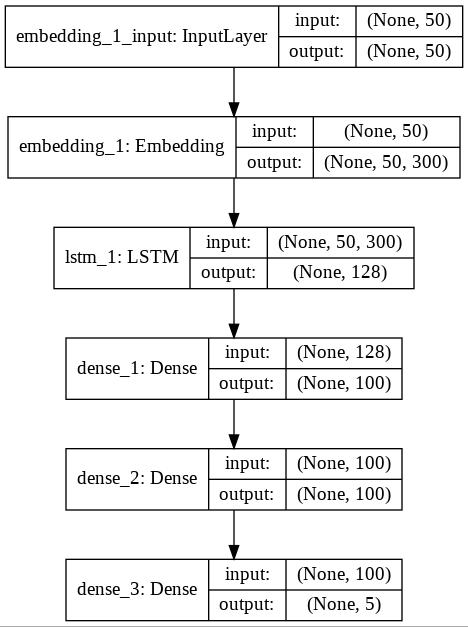

In [ ]:
# Importing plot_model from Keras utilities for visualizing the model architecture
from keras.utils.vis_utils import plot_model

# Plotting the architecture of the LSTM model and saving it to a JPEG file
plot_model(model_lstm, to_file='model_plot.jpeg', show_shapes=True, show_layer_names=True)


#**Building a Neural Network with LSTM**

In [ ]:
def create_nn():

  # Initialize a sequential model
  model = Sequential()

  # Add an embedding layer with pre-trained embeddings
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False))

  # Add LSTM layer with dropout
  model.add(LSTM(128, dropout=0.5))

  # Add dense layers with ReLU activation
  model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='relu'))

  # Output layer with softmax activation for multiclass classification
  model.add(Dense(5, activation='softmax'))

  # Compile the model with categorical crossentropy loss and rmsprop optimizer
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

  return model

#**Label Encoding**

In [ ]:
# Import Label Encoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder to convert categorical labels to numerical format
encoder = LabelEncoder()

# Fit LabelEncoder on the 'sentiment' column of DataFrame df and transform labels to numerical values
labels = encoder.fit_transform(df['sentiment'])

# Convert numerical labels to categorical format for neural network training
labels = to_categorical(labels)


#**Evaluating Neural Network using Three-Fold Cross Validation**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

# Define a KerasClassifier wrapper around the create_nn function for use in scikit-learn
neural_network = KerasClassifier(build_fn=create_nn, epochs=10, verbose=0)

# Perform three-fold cross-validation on the neural network model using data and labels
cross_val_score(neural_network, data, labels, cv=3)


array([0.55060208, 0.55703652, 0.55166394])